In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
x_train.shape,y_train.shape, "************" , x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '************', (10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [ "T-shirt/top", "Trouser","Pullover","Coat","Sandal","Shirt","Sneaker","Bag","Ankle","boot"]


In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

In [ ]:
# show image

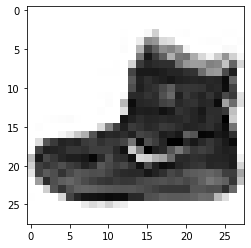

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

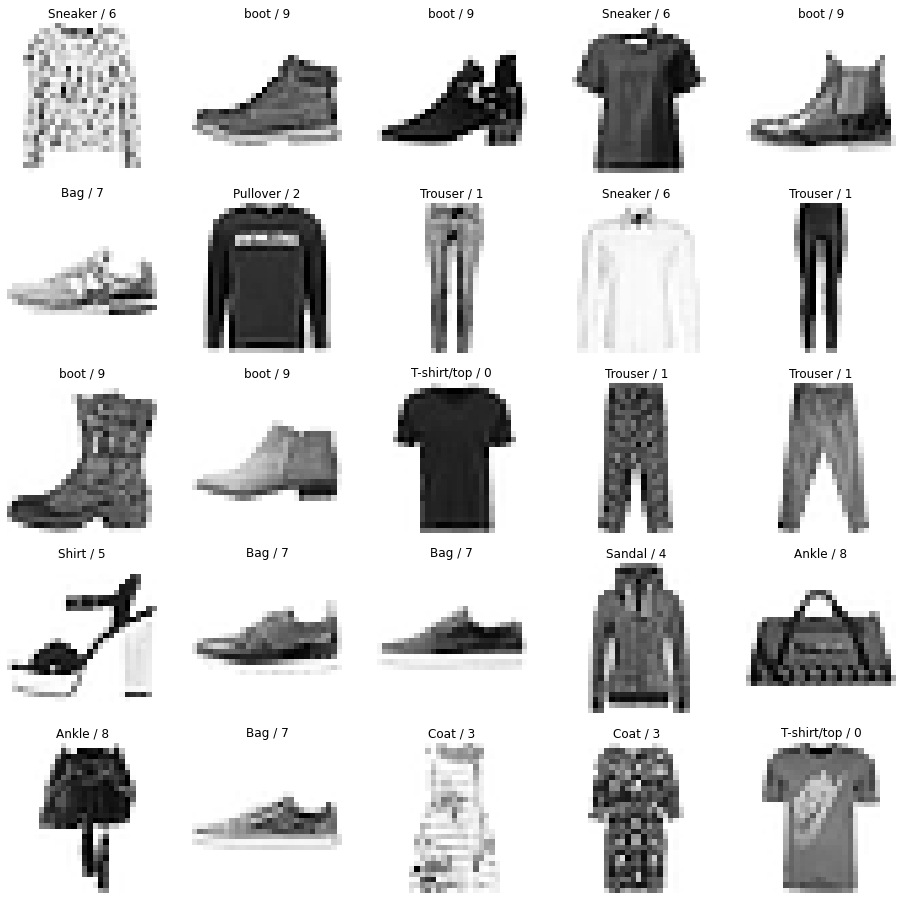

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
   plt.subplot(5,5,j);j+=1
   plt.imshow(x_train[i],cmap='Greys')
   plt.axis('off')
   plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))


In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)


In [ ]:
x_train.ndim

4

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
# feature scaling

In [ ]:
x_train = x_train/255
x_test= x_test/255

In [ ]:
# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model=keras.models.Sequential([
                           keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                           keras.layers.MaxPooling2D(pool_size=(2,2)),
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=128,activation='relu'),
                           keras.layers.Dense(units=10,activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 23s 238ms/step - loss: 0.6338 - accuracy: 0.7843 - val_loss: 0.4320 - val_accuracy: 0.8474
Epoch 2/10
94/94 [==============================] - 22s 235ms/step - loss: 0.3801 - accuracy: 0.8674 - val_loss: 0.3659 - val_accuracy: 0.8711
Epoch 3/10
94/94 [==============================] - 22s 234ms/step - loss: 0.3317 - accuracy: 0.8854 - val_loss: 0.3385 - val_accuracy: 0.8823
Epoch 4/10
94/94 [==============================] - 22s 231ms/step - loss: 0.3054 - accuracy: 0.8922 - val_loss: 0.3360 - val_accuracy: 0.8802
Epoch 5/10
94/94 [==============================] - 22s 232ms/step - loss: 0.2843 - accuracy: 0.8985 - val_loss: 0.3025 - val_accuracy: 0.8948
Epoch 6/10
94/94 [==============================] - 22s 230ms/step - loss: 0.2637 - accuracy: 0.9071 - val_loss: 0.2883 - val_accuracy: 0.9012
Epoch 7/10
94/94 [==============================] - 22s 236ms/step - loss: 0.2484 - accuracy: 0.9113 - val_loss: 0.2866 - val_accuracy: 0.8982

In [ ]:
y_pred = model.predict(x_test)
y_pred.round(2)
                      

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.19, 0.06, 0.02]], dtype=float32)

In [ ]:
y_test

In [ ]:
model.evaluate(x_test,y_test)

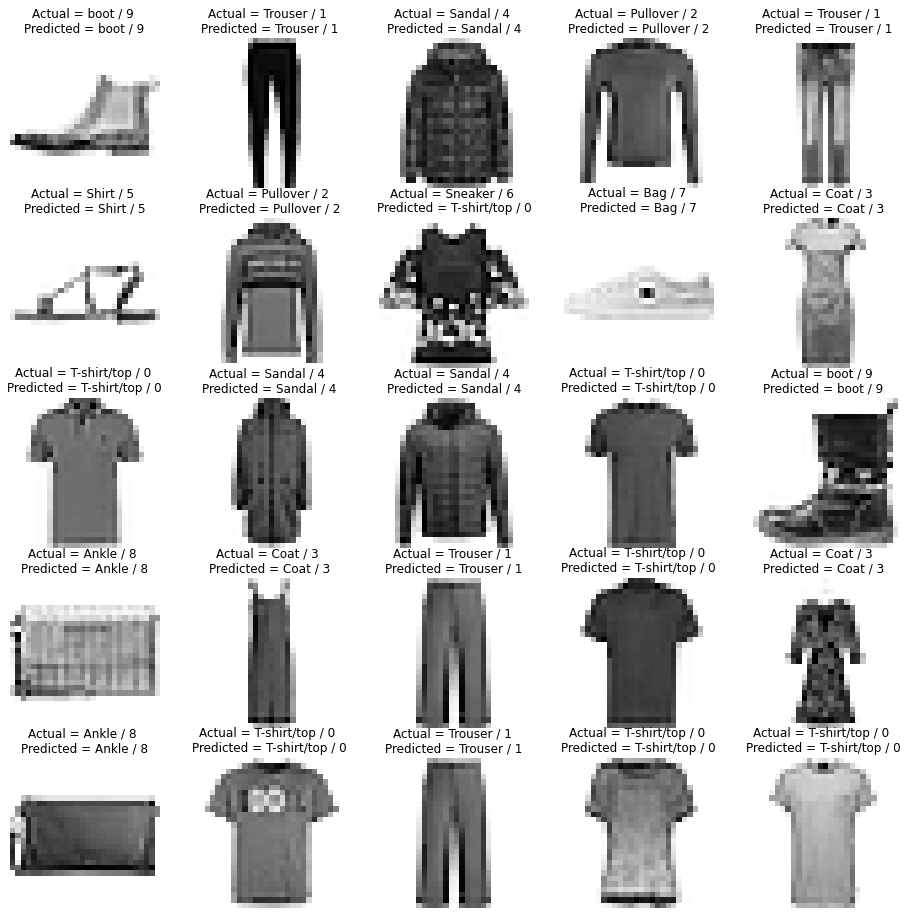

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5 ,j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.92      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.76      0.90      0.83      1000
        Coat       0.89      0.92      0.90      1000
      Sandal       0.86      0.81      0.83      1000
       Shirt       0.98      0.97      0.97      1000
     Sneaker       0.86      0.53      0.66      1000
         Bag       0.94      0.97      0.95      1000
       Ankle       0.98      0.97      0.98      1000
        boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



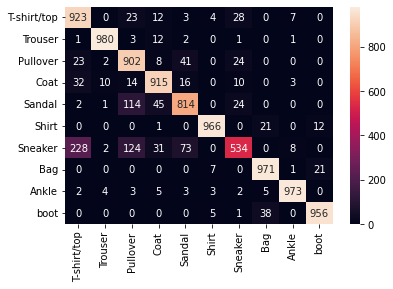

In [ ]:
sns.heatmap(cm, annot=True, fmt='d' ,xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)